In [2]:
import numpy as np
import seaborn as sns
import pandas as pd

from IPython.core.pylabtools import figsize

import matplotlib.pyplot as plt
sns.set()

In [3]:
# Some utils functions: 
import math

def nCr(n,r):
    f = math.factorial
    return f(n) // f(r) // f(n-r)

In [4]:
def get_bionamal_distribution(N, pi):
    p = []
    index = []
    for i in range(0, N + 1):
        w = pi ** i
        b = (1 - pi) ** (N - i)
        C = nCr(N, i)
        
        p.append(C * w * b)
        index.append(i)
    
    return p

## I. Suy luận thống kê là gì?

Suy luận thống kê quan tâm tới việc chúng ta cố gắng học những tính chất chưa biết của thế giới, thông qua những gì đã biết, đặc biệt khi có sự không chắc chắn (uncertainty). Bỏ qua suy luận thống kê, chúng ta sẽ ra những quyết định kém, gây lãng phí.

Suy luận thống kê quan tâm tới 2 khái niệm: 
- Data Analysis
- Model Analysis. 

Data là 1 tập các sự kiện, ví dụ như số, chuỗi, phép đo, quan sát hoặc một mô tả nào đó. Data có thể  mang tính định tính (Quanlitive) hoặc định lượng (Quantitative). Data có thể là Sample và Population. Population là toàn bộ Data về vấn đề ta quan tâm. Sample là những Data ta đã thu thập. 

Trong thực tế, ta không thể thu thập được Population, do đó ta chỉ có thể thực hiện Data Analysis và Modeling trên Sample. 

Model là 1 tập các giả thuyết (assumptions) về Data. Trong suy luận thống kê, Model thể hiện dưới dạng toán học. Kể cả dùng chung 1 phương pháp toán học trên Data, Model cũng có thể  đưa ra các cách giải thích khác nhau về Data tùy vào vấn đề. Model phải đơn giản, tức là tập hợp assumptions phải tổng hợp Data trong 1 tập nhỏ hơn Data, từ đó chúng có thể được sử dụng để suy luận, cho phép dự đoán về các sự kiện chưa xuất hiện.

Mục tiêu của suy luận thống kê là thu thập Data, update hiểu biết của chúng ta về 1 tập các models có thể mô tả Data. Quy trình chung là: chúng ta cố gắng tạo ra các assumptions tốt nhất về Data, cải thiện các suy luận khi có Data mới, và lên kế hoạch thu thập Data mới có thể hữu dụng để cải thiện các suy luận. Nói tóm lại, quá trình này là:

> Intial Infernce + New Data -> Improved Inference

Trong thực tế, ta không thể thu thập được population. Như vậy, về  định tính, ta có thể thấy: 
> "Essentially, all models are wrong, but some are useful".

Như vậy, chúng ta sẽ gặp phải các vấn đề như sau:
- Quan hệ giữa Sample và Population ? (Ví dụ: Sample có giá trị thay thế cho Population không, Sample có thể hiện đúng Population hay không, Population có thể tạo ra Sample không, Sample nào tốt hơn Sample nào).
- Quan hệ giữa các Models ? (Ví dụ: Model 1 hay Model 2 đúng hơn, Model 1 đúng và sai trong những trường hợp nào, Model 1 và Model 2 có những điểm gì chung). 
- Quan hệ giữa Model và Data ? (Ví dụ: Model có thể hiện được Sample và Population hay không)
    
Để trả lời các vấn đề trên, ta cần có cách định lượng quan hệ giữa Model và Data.

## II. Quy trình Bernoulli - Luật số nhỏ và Luật số lớn: 

Xét câu sau:
> "Trong một cuộc thăm dò trên điện thoại với 300 người, 60% số người ủng hộ tổng thống."

Hãy nhận xét về câu trên. Kể cả với những người đã nghe về Luật số nhỏ cũng sẽ đưa ra nhận xét rằng 60% người dân ủng hộ tổng thống. Vậy có phải 60% số người dân ủng hộ tổng thống không?

Ta xét các câu khác:
> "Trong một cuộc thăm dò trên điện thoại với 10 người, 60% số người ủng hộ tổng thống."

> "Trong một cuộc thăm dò trên điện thoại với 100 người, 60% số người ủng hộ tổng thống."

> "Trong một cuộc thăm dò trên điện thoại với 200 người, 60% số người ủng hộ tổng thống."

Thực tế trực giác của con người quan tâm tới phần sau của câu chuyện: 60% số người ủng hộ tổng thống chứ ta không quan tâm tới kích thước sample. Quan niệm sai - hoặc trực giác sai rất phổ biến. Nó có tên là bias do lấy sample thiếu nhạy cảm hay Luật số nhỏ. Luật số nhỏ không thực sự là một quy luật. Đó là cái tên châm biếm mô tả những nỗ lực sai lầm nhằm áp dụng Luật số lớn khi mà sample chưa đủ lớn. Thực tế đây là cách học tập của loài người về các vấn đề tự nhiên. 

Quy trình Bernoulli giúp định lượng hóa sai số của Sample so với Population. 
    
Đây là công trình được viết trong 20 năm của Bernoulli, được coi là "Định luật vàng". Có nhiều tên gọi cho định luật này: Định luật Bernoulli, Luật số lớn, Luật số lớn yếu...
Mặc dù Bernoulli muốn có những ứng dụng trong thế giới thực, nhưng các ví dụ yêu thích của ông lại là về một chiếc bình chứa các viên đá thạch anh. 
Ví dụ, có 1 bình chứa các viên đá thạch anh. Giả sử có 1 bình chứa các viên đá thạch anh: 3000 viên trắng và 2000 viên đen, tỷ lệ là 60% số viên đá là trắng và 40% là viên đen.

Ta có thể đưa ra các assumptions như sau: 

In [5]:
p_White = 0.6
p_Black = 0.4

Ta có cơ hội bao nhiêu phần trăm để lấy ra 1 sample có kích thước N mô tả đúng quy luật của hộp trên. Để đảm bảo tỷ lệ các viên đen và viên trắng của bình không đổi, khi lấy 1 viên đá ra khỏi bình, ta bù 1 viên cùng màu vào bình. Lưu ý N cần nhỏ hơn 5000.

Với N = 100, ta cần lấy 1 sample chứa chính xác 60 viên trắng:

In [6]:
p = get_bionamal_distribution(100, p_White)
print ("{0:.2f}".format(p[60] * 100) + "%")

8.12%


Để đánh giá xem mẫu có tốt không, ta dùng khái niệm sai số trung bình:

(Cần sửa)

Giả sử ta chấp nhận rằng sẽ có 5% sai số, tức là khả năng chúng ta lấy sample chứa chính xác từ 55 đến 65 viên:

In [17]:
p1 = sum(p[55:65 + 1])
print ("{0:.2f}".format(p1 * 100) + "%")

73.86%


5% được gọi là sai số của sample. Bây giờ ta cần tìm N để khả năng lấy được 1 sample có sai số 5% là 95%. 95% được gọi là khoảng tin cậy của sample. Ta thử với các trường hợp sau: 10, 100, 200, 300, 370, 400.

In [18]:
N = [10, 100, 200, 300, 370, 400]
index = []
prob = []
p_truth = []

for j in range(len(N)):
    n = N[j]
    i = [j for j in range(n + 1)]
    p = get_bionamal_distribution(n, p_White)
    
    expected = int(n * p_White)
    error = int(n * 5 / 100)
    
#     print(expected, error)
    
    p_t = sum(p[expected - error: expected + error + 1]) * 100
    
    index.append(i)
    prob.append(p)
    
    p_truth.append(p_t)

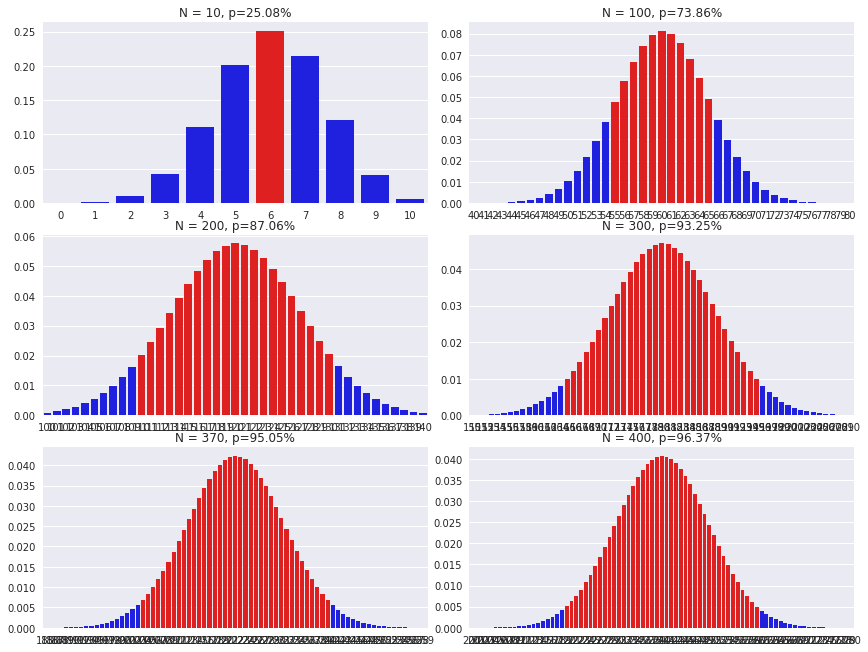

In [21]:
fig, axs = plt.subplots(ncols=2, nrows=3)
fig.set_size_inches(12, 9)
fig.tight_layout()

from_plot = [0, 40, 100, 150, 185, 200]
end_plot = [10, 80, 140, 210, 259, 280]

for j in range(len(N)):
    n = N[j]
    
    expected = int(n * p_White)
    error = int(n * 5 / 100)
    clrs = ['red' if (x >= expected - error and x <= expected + error) else 'blue' for x in range(n + 1)]
    
    title = "N = " + str(n) +", p=" + "{0:.2f}".format(p_truth[j]) + "%" 
    sns.barplot(x=index[j][from_plot[j]: end_plot[j] + 1], 
                y=prob[j][from_plot[j]: end_plot[j] + 1], 
                palette=clrs[from_plot[j]: end_plot[j] + 1], 
                ax=axs[int(j / 2)][int(j % 2)]).set_title(title)

Qua bài toán trên, ta nhận thấy nếu lấy kích thước sample bằng 370, ta có xác suất 95% mô tả được population với sai số 5%.

Luật số lớn đơn giản là kích thước sample càng lớn càng có khả năng cao mô tả chính xác population. 

## III. Quy trình Bayes - Ước lượng tham số model
    
All models are wrong. Như vậy trong thực nghiệm ta không thể đạt đến model chính xác 100%. Vấn đề là với chỉ sample ta có thể suy ra 1 model chính xác bao nhiêu và so với các model khác, model của chúng ta đáng tin cậy hơn bao nhiêu.

Ta giải bài toán sau:
Có 11 hộp đựng đá thạch anh như sau:
- Hộp 0: 0% viên trắng, 100% viên đen.
- Hộp 1: 10% viên trắng, 90% viên đen.
- Hộp 2: 20% viên trắng, 80% viên đen.
- Hộp 3: 30% viên trắng, 70% viên đen.
- Hộp 4: 40% viên trắng, 60% viên đen.
- Hộp 5: 50% viên trắng, 50% viên đen.
- Hộp 6: 60% viên trắng, 40% viên đen.
- Hộp 7: 70% viên trắng, 30% viên đen.
- Hộp 8: 80% viên trắng, 20% viên đen.
- Hộp 9: 90% viên trắng, 10% viên đen.
- Hộp 10: 100% viên trắng, 0% viên đen.


In [7]:
p_White = []
for i in range(11):
    p_White.append(i / 10)
    
p_White

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

Chọn lấy một hộp bất kỳ. Lấy ra 10 viên, thấy có 6 viên trắng.
Hỏi khả năng được chọn của từng hộp.

Giả sử ta có 11 người đoán xem hộp nào đúng. Người 1 chọn hộp 1, người 2 chọn hộp 2, người 3 chọn hộp 3...
Để dễ mô tả, ta gọi người 1 là model1, người 2 là model2, người 3 là model3... Khái niệm model trong phạm vi bài viết phù hợp với cách gọi này.

Ta cần định lượng sai số của 11 model so với data:
> P(model | data)

Hiện tại ta không biết gì về hộp được chọn nên khả năng được chọn của các hộp là như nhau: 
> P(model1) = P(model2) = P(model3) = ...

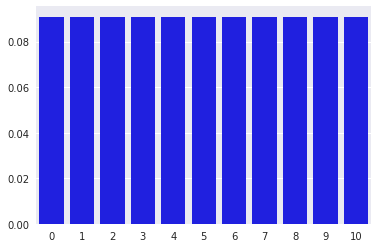

In [10]:
belief = []
index = []

clrs = ['blue' for x in range(11 + 1)]
for i in range(11):
    index.append(i)
    belief.append(1 / 11)
    
sns.barplot(x=index, y=belief, palette=clrs)

Luật Bayes đơn giản như sau:
> P(A|B) * P(B) = P(B|A) * P(A)

> P(A|B) = P(B|A) * P(A) / P(B)

Luật Bayes cho phép mở rộng các xuất có điều kiện để tính các xác suất chưa biết. 
> P(A): là xác suất tiền nghiệm, xác suất đã có (prior).

> P(B|A): là xác suất xảy ra B khi A xảy ra (likelihood).

> P(B): là xác suất xảy ra sự kiện B (evidence).

> P(A|B): là xác suất hậu nghiệm (posterior).

Trong bài toán của chúng ta, ta có:
> P(model|data) = P(data|model) * P(model) / P(data)

Lấy 10 viên bất kỳ từ hộp rồi bù 10 viên cùng màu. Ta thấy viên đó 6 có màu trắng. Xác suất chọn đúng của từng người thay đổi như thế nào?

In [11]:
posterior = []
for i in range(11): 
    p_likelihood = get_bionamal_distribution(10, p_White[i])[6]
    p_posterior = p_likelihood * belief[i]
    posterior.append(p_posterior)

for i in range(11):
    belief[i] = posterior[i] / sum(posterior)

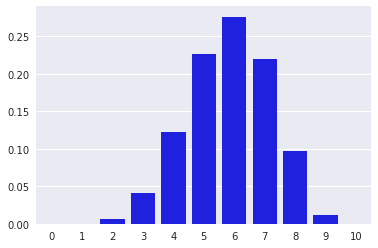

In [12]:
sns.barplot(x=index, y=belief, palette=clrs)